In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Métodos implementados

In [49]:
def gauss_jordan(A, B):
  n = len(A)
  A_cp = A.copy()
  B_cp = B.copy()

  for i in range(n):
    pivot = A_cp[i,i]
    A_cp[i,:] /= pivot
    B_cp[i] /= pivot

    for j in range(n):
      if j != i:
        m = (-1)*A_cp[j,i]/A_cp[i,i]
        A_cp[j,:] += A_cp[i,:]*m
        B_cp[j] += B_cp[i]*m

  return A_cp, B_cp

In [50]:
def vandermonde_matrix(x):
  n = len(x)
  m = np.ones((n, n))

  for i in range(1,n):
    m[:, i] = x**i

  return m

In [51]:
def estimate_pn(ai, x):
  return np.sum(ai * np.array([x** i for i in range(len(ai))]))

In [52]:
def gera_estimativa(coef, x):
  sum = 0
  for i in range(len(coef)):
    sum += coef[i] * (x**i)

  return sum

In [53]:
def divided_differences(x, fx):
  n = len(fx)
  table = np.zeros((n, n))
  table[:, 0] = fx

  for j in range(1, n):
    for i in range(n - j):
      table[i, j] = (table[i+1, j-1] - table[i, j-1]) / (x[i+j] - x[i])

  return table

In [54]:
def lagrange_interpolation(x, xi, yi):
  n = len(xi)
  sum = 0

  for k in range(n):
    prod = 1
    for j in range(n):
      if j != k:
        prod *= (x - xi[j]) / (xi[k] - xi[j])
    sum += yi[k] * prod

  return sum

In [55]:
def newton_interpolation(x0, xi, divided_differences):
  n = len(xi)
  result = 0

  for i in range(n):
    term = divided_differences[i]
    for j in range(i):
      term *= (x0 - xi[j])
    result += term

  return result

In [56]:
def interp1(x0, x, y):
  return y[0] + ((y[1] - y[0]) / (x[1] - x[0])) * (x0 - x[0])

In [57]:
def linear_spline(x, y):
  for i in range(len(x)-1):
    X = np.linspace(x[i], x[i+1], 20)
    it_interp = interp1(X, [x[i], x[i+1]], [y[i], y[i+1]])
    plt.plot(X, it_interp, label=f'p{i}(x)')
  plt.plot(x, y, 'ro', label='Data points')
  plt.title('Spline linear')
  plt.legend()
  plt.show()

# 1 – Desenvolva um algoritmo para encontrar o polinômio interpolador do conjunto de pontos {(0, 1), (1, 6), (2, 5), (3, -8)}, utilizando o processo de solução de sistemas de equações. Plote o gráfico obtido !

In [58]:
x = np.array([0, 1, 2, 3], dtype='float')
fx = np.array([1, 6, 5, -8], dtype='float').reshape(-1, 1)

m = vandermonde_matrix(x)
_, ai = gauss_jordan(m, fx)
ai

array([[ 1.],
       [ 6.],
       [ 0.],
       [-1.]])

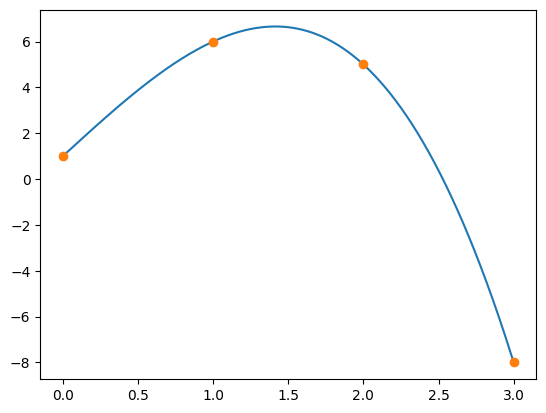

In [59]:
xx = np.linspace(min(x), max(x), 1000)
yy = []
for num in xx:
  yy.append(gera_estimativa(ai, num))

plt.plot(xx, yy)
plt.plot(x, fx, 'o')

# 2 – Desenvolva um algoritmo que use o método de diferenças divididas para encontrar o polinômio que passe pelos pontos (-1, 3), (0, 1), (1, 3), (3, 43).

# Compare os resultados com o obtido de forma teórica:

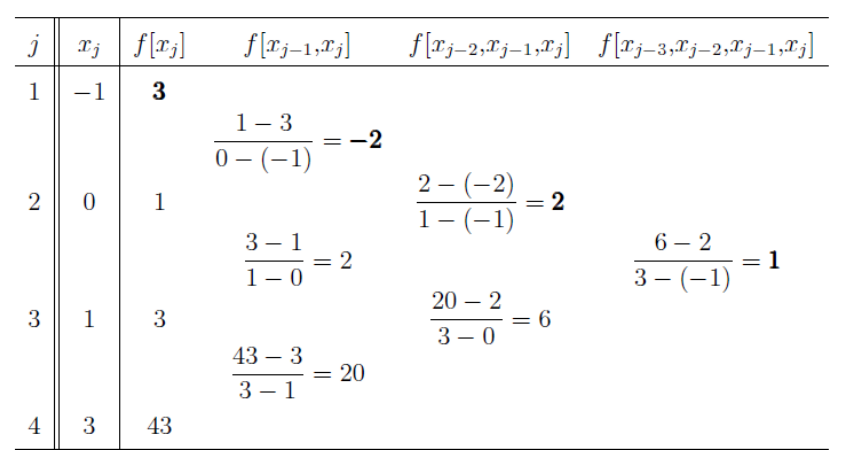

In [60]:
x = np.array([-1, 0, 1, 3], dtype='float')
fx = np.array([3, 1, 3, 43], dtype='float')
table = divided_differences(x, fx)
print(table)
coefs = table[0]

[[ 3. -2.  2.  1.]
 [ 1.  2.  6.  0.]
 [ 3. 20.  0.  0.]
 [43.  0.  0.  0.]]


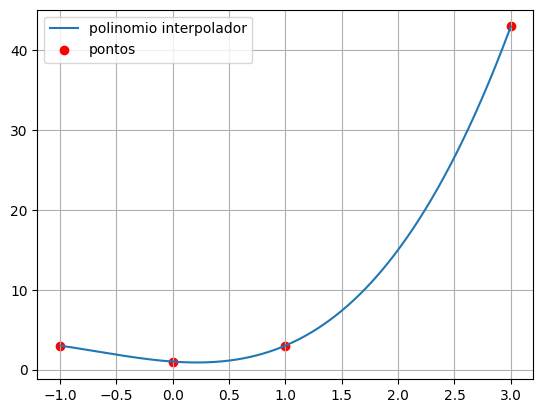

In [61]:
xx = np.linspace(min(x), max(x), 1001)
yy = []

for num in xx:
  yy.append(newton_interpolation(num, x, coefs))

plt.plot(xx, yy, label='polinomio interpolador')
plt.scatter(x, fx, c='r', label='pontos')
plt.legend()
plt.grid()
plt.show()

# 3 – Encontre o polinômio da forma $p(x) = a_1 + a_2x + a_3x^2 + a_4x^3$ que passa pelos pontos (0, 0), (1, 1), (2, 4), (3, 9), utilizando o método de Lagrange. Apresente a expressão de cada polinômio de Lagrange.

In [62]:
x = np.array([0, 1, 2, 3], dtype='float')
fx = np.array([0, 1, 4, 9,], dtype='float')

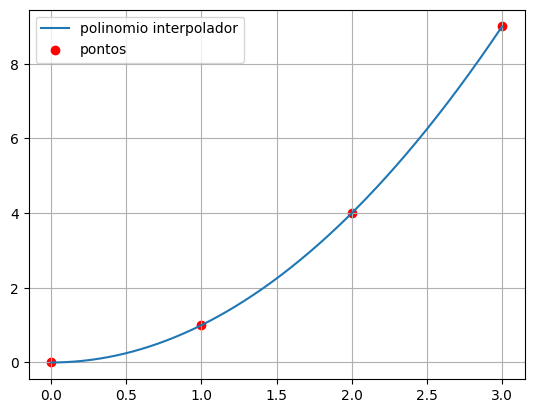

In [63]:
xx = np.linspace(min(x), max(x), 1001)
yy = []

for num in xx:
  yy.append(lagrange_interpolation(num, x, fx))

plt.plot(xx, yy, label='polinomio interpolador')
plt.scatter(x, fx, c='r', label='pontos')
plt.legend()
plt.grid()
plt.show()

# 4 – Construa uma função linear por partes que interpola os pontos (0, 0), (1, 4), (2, 3), (3, 0), (4, 2), (5, 0), utilizando:

## (a) Spline linear

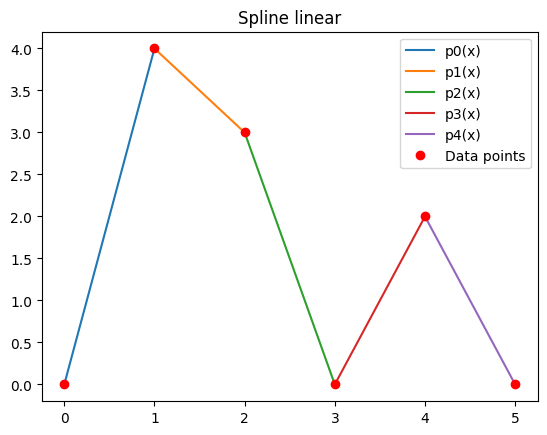

In [64]:
x = np.array([0, 1, 2, 3, 4, 5])
fx = np.array([0, 4, 3, 0, 2, 0])

linear_spline(x,fx)

## (b) Spline quadrática

## (c) Spline cúbica

# 5 – Você mediu a queda de voltagem através de um resistor para diversos valores diferentes da corrente i. Os resultados são:

$$
\begin{array}{|c|c|}
\hline
i & 0,25 & 0,75 & 1,25 & 1,5 & 2,0\\
\hline
V & -0,45 & -0,6 & 0,7 & 1,88 & 6,0\\
\hline
\end{array}
$$

# Use interpolação polinomial de primeiro a quarto grau para fazer uma estimativa da queda de voltagem para i = 1,15. Interprete seus resultados.

In [65]:
x0 = 1.15

x1 = np.array([0.75, 1.25])
fx1 = np.array([-0.6, 0.7])
coefficients1 = divided_differences(x1, fx1)[0]
f1 = newton_interpolation(x0, x1, coefficients1)

x2 = np.array([0.75, 1.25, 1.5])
fx2 = np.array([-0.6, 0.7, 1.88])
coefficients2 = divided_differences(x2, fx2)[0]
f2 = newton_interpolation(x0, x2, coefficients2)

x3 = np.array([0.25, 0.75, 1.25, 1.5])
fx3 = np.array([-0.45, -0.6, 0.7, 1.88])
coefficients3 = divided_differences(x3, fx3)[0]
f3 = newton_interpolation(x0, x3, coefficients3)

x4 = np.array([0.25, 0.75, 1.25, 1.5, 2])
fx4 = np.array([-0.45, -0.6, 0.7, 1.88, 6])
coefficients4 = divided_differences(x4, fx4)[0]
f4 = newton_interpolation(x0, x4, coefficients4)

print(f'Estimativa f({x0}) 1º grau: {f1:.4f}')
print(f'Estimativa f({x0}) 2º grau: {f2:.4f}')
print(f'Estimativa f({x0}) 3º grau: {f3:.4f}')
print(f'Estimativa f({x0}) 4º grau: {f4:.4f}')

Estimativa f(1.15) 1º grau: 0.4400
Estimativa f(1.15) 2º grau: 0.3269
Estimativa f(1.15) 3º grau: 0.3261
Estimativa f(1.15) 4º grau: 0.3373
